# **Data Preprocessing**

---

<div class="list-group" id="list-tab" role="tablist">

## MỤC LỤC:
- [1. IMPORT THƯ VIỆN](#1)

- [2. RELATIVE PATHS](#2)
 
- [3. ĐỌC DỮ LIỆU TRONG FILE `anime-dataset-2023.csv`](#3)
    - [3.1 Số dòng và số cột của bộ dữ liệu](#3.1)
    - [3.2 Ý nghĩa của các hàng và các cột](#3.2)

- [4. LOẠI BỎ CÁC CỘT KHÔNG CÓ GIÁ TRỊ SỬ DỤNG](#4)

- [5. KIỂM TRA DỮ LIỆU BỊ TRÙNG](#5)

- [6. XEM XÉT VÀ PHÂN TÍCH CÁC THUỘC TÍNH LIÊN QUAN ĐẾN BỘ DỮ LIỆU](#6)
    - [6.1. Kiểm tra các giá trị `UNKNOWN`](#6.1)
    - [6.2. Xem xét các giá trị `UNKNOWN` trong `Score`](#6.2)
    - [6.3. Loại bỏ các giá trị `UNKNOWN` trong cột `Genres`](#6.3)
    - [6.4. Xem xét các giá trị `UNKNOWN` của cột `Type`](#6.4)
    - [6.5. Điều chỉnh giá trị của cột `Duration`](#6.5)
    - [6.6. Điều chỉnh giá trị cột `Aired`. Tạo ra 2 cột mới là `Realeased date` và `Completed date` từ `Aired`](#6.6)
    - [6.7. Xem xét dữ liệu của cột `Episodes`](#6.7)
    - [6.8. Kiểm tra dữ liệu của cột `Rating`](#6.8)
    - [6.9. Kiểm tra dữ liệu của cột `Score By`](#6.9)
    - [6.10. Điều chỉnh lại dữ liệu của cột `Rank`](#6.10)

- [7. LƯU DỮ LIỆU ĐÃ ĐƯỢC XỬ LÝ](#7)
    - [7.1. Kiểm tra lại kiểu dữ liệu của các cột, các thuộc tính](#7.1)
    - [7.2. Xuất ra file .csv](#7.2)

- [8. KIỂM TRA LẠI BỘ DỮ LIỆU](#8)

- [9. ĐÁNH GIÁ VÀ NGUỒN THAM KHẢO](#9)
    - [9.1. Suy nghĩ và đánh giá](#9.1)
    - [9.2. Nguồn tham khảo](#9.2)

---

<a class="anchor" id="1"></a>

## 1. IMPORT THƯ VIỆN

Đây là những thư viện dùng cho Data Preprocessing:
- `numpy`: Dùng cho các phép toán trên ma trận
- `pandas`: Dùng để lưu trữ dữ liệu từ các tệp `.csv` và vận hành các hàm trên DataFrame
- `matplotlib`: Dùng để trực quan hóa dữ liệu
- `seaborn`: Dùng để trực quan hóa dữ liệu
- `re`: Dùng cho các biểu thức chính quy để trích xuất, phân tích cú pháp, làm sạch chuỗi
- `datetime` từ `datetime`: Cung cấp các lớp để làm việc với ngày và giờ

In [3]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import re

<a class="anchor" id="2"></a>

## 2. RELATIVE PATHS

Nhóm sẽ lấy những đường dẫn đến các file cần thiết cho Data Preprocessing

In [4]:
HOME = os.getcwd()
print('HOME', HOME)

# DATASET_PATH = os.path.join(HOME, 'raw_animes_dataset')
# print('DATASET FOLDER', DATASET_PATH)

# ANIME_DATASET_2023 = os.path.join(DATASET_PATH, 'anime-dataset-2023.csv')
# print('ANIME DATASET 2023', ANIME_DATASET_2023)

HOME d:\Data Science Programming\External_Projects\Streamlit Project
DATASET FOLDER d:\Data Science Programming\External_Projects\Streamlit Project\raw_animes_dataset
ANIME DATASET 2023 d:\Data Science Programming\External_Projects\Streamlit Project\raw_animes_dataset\anime-dataset-2023.csv


<a class="anchor" id="3"></a>

## 3. ĐỌC DỮ LIỆU TRONG FILE `anime-dataset-2023.csv`

In [3]:
raw_anime_df = pd.read_csv(r"anime-dataset-2023.csv")
raw_anime_df.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


<a class="anchor" id="3.1"></a>

### 3.1 Số dòng và số cột của bộ dữ liệu 

In [4]:
n_rows , n_cols = raw_anime_df.shape
print(f'Có {n_rows} dòng và {n_cols} cột trong bộ dữ liệu')

Có 24905 dòng và 24 cột trong bộ dữ liệu


**Nhận xét**
- Tập dữ liệu gồm 24,905 dòng với 24 cột tương ứng với 24 thuộc tính của bộ dữ liệu
- Bộ dữ liệu này mô tả các thông tin chi tiết về các bộ anime tính đến năm 2023

<a class="anchor" id="3.2"></a>

### 3.2 Ý nghĩa của các hàng và các cột

- Mỗi dòng dữ liệu trong bộ dữ liệu này là dữ liệu về một bộ anime được thu thập trên MyAnimeList vào năm 2023
- Mỗi cột dữ liệu trong bộ dữ liệu gốc lần lượt có ý nghĩa như sau:

| **Thuộc tính**         | **Ý nghĩa**                                                                                   |
|-------------------------|----------------------------------------------------------------------------------------------|
| `anime_id`             | Mã định danh duy nhất cho mỗi bộ anime.                                                     |
| `Name`                 | Tên anime trong tiếng Nhật.                                                                 |
| `English name`         | Tên anime khi dịch sang tiếng Anh.                                                          |
| `Other name`           | Các tên gọi khác của anime.                                                                 |
| `Score`                | Điểm số hoặc đánh giá của anime thể hiện mức độ yêu thích của người xem.                    |
| `Genres`               | Các thể loại của anime, phân cách bằng dấu phẩy (ví dụ: hành động, hài hước, lãng mạn, v.v.).|
| `Synopsis`             | Tóm tắt nội dung chính hoặc cốt truyện của anime.                                           |
| `Type`                 | Loại hình anime (ví dụ: TV series, movie, OVA...).                                          |
| `Episodes`             | Số tập của anime.                                                                           |
| `Aired`                | Khoảng thời gian anime được phát sóng.                                                      |
| `Premiered`            | Mùa và năm mà anime ra mắt.                                                                 |
| `Status`               | Tình trạng phát sóng của anime (ví dụ: đã phát sóng xong, đang phát sóng...).               |
| `Producers`            | Các công ty hoặc cá nhân sản xuất anime.                                                    |
| `Licensors`            | Các công ty cấp phép phát sóng anime (ví dụ: các nền tảng streaming).                       |
| `Studios`              | Các xưởng phim hoạt hình tham gia sản xuất anime.                                           |
| `Source`               | Nguồn gốc của anime (ví dụ: manga, light novel, nguyên tác gốc...).                         |
| `Duration`             | Thời lượng mỗi tập phim.                                                                    |
| `Rating`               | Đánh giá độ tuổi của anime (ví dụ: PG, R-18...).                                            |
| `Rank`                 | Xếp hạng của anime dựa trên mức độ nổi bật hoặc phổ biến.                                    |
| `Popularity`           | Xếp hạng độ phổ biến của anime.                                                             |
| `Favorites`            | Số lượng người dùng đã đánh dấu anime là yêu thích.                                         |
| `Scored By`            | Số lượng người dùng đã đánh giá anime.                                                      |
| `Members`              | Số lượng thành viên đã thêm anime vào danh sách của họ trên nền tảng.                       |
| `Image URL`            | Địa chỉ URL của hình ảnh hoặc poster của anime.                                              |

<a class="anchor" id="4"></a>

## 4. LOẠI BỎ CÁC CỘT KHÔNG CÓ GIÁ TRỊ SỬ DỤNG

- Trong bộ dữ liệu gốc này, có một số thuộc tính không cần thiết và không có giá trị để sử dụng. Các thuộc tính này bao gồm: `anime_id`, `English name`, `Other name`, `Status`, `Licensors`, `Premiered`, `Image URL`.
- Nhóm quyết định loại bỏ chúng ra khỏi bộ dữ liệu. 

In [5]:
raw_anime_df = raw_anime_df.drop(columns=['anime_id', 'English name', 'Other name', 'Status', 'Licensors', 'Premiered', 'Image URL'])
raw_anime_df.head()

,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Producers,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members
0,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505
1,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001","Sunrise, Bandai Visual",Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978
2,Trigun,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252
3,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002","Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931
4,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001


<a class="anchor" id="5"></a>

## 5. KIỂM TRA DỮ LIỆU BỊ TRÙNG

In [6]:
duplicate_rows = raw_anime_df[raw_anime_df.duplicated()]
duplicate_rows

,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Producers,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members


Điều này cho nhóm thấy rằng bộ dữ liệu gốc không có dòng nào trùng nhau trong bộ dữ liệu.

<a class="anchor" id="6"></a>

## 6. XEM XÉT VÀ PHÂN TÍCH CÁC THUỘC TÍNH LIÊN QUAN ĐẾN BỘ DỮ LIỆU

<a class="anchor" id="6.1"></a>

### 6.1. Kiểm tra các giá trị `UNKNOWN`

Trong bộ dữ liệu này, có một vài giá trị trong các cột có giá trị là **UNKNOWN**. Để đảm bảo rằng các giá trị **UNKNOWN** này không làm ảnh hưởng đến chất lượng của bộ dữ liệu, nhóm sẽ kiểm tra các giá trị **UNKNOWN** này.

In [7]:
# Đếm số lượng "UNKNOWN" trong từng cột
unknown_count_per_column = ((raw_anime_df == 'UNKNOWN') | (raw_anime_df == 'Unknown')).sum()

# Xem kết quả
print("Số lượng 'UNKNOWN' hoặc 'Unknown' trong từng cột:")
print(unknown_count_per_column)

Số lượng 'UNKNOWN' hoặc 'Unknown' trong từng cột:
Name              0
Score          9213
Genres         4929
Synopsis          0
Type             74
Episodes        611
Aired             0
Producers     13350
Studios       10526
Source         3689
Duration        663
Rating          669
Rank           4612
Popularity        0
Favorites         0
Scored By      9213
Members           0
dtype: int64


Theo quá trình khám phá dữ liệu ở trên, nhóm nhận thấy trong dataset tồn tại các giá trị thiếu (**UNKNOWN**). Vì vậy, nhóm cần thực hiện các bước sau :

- Tính tỉ lệ giá trị thiếu của mỗi cột và trực quan hóa bằng biểu đồ cột
- Drop các cột có tỉ lệ giá trị thiếu lớn hơn 75%
- Xem xét giá trị thiếu ở các dòng trong từng thuộc tính và xử lí chúng

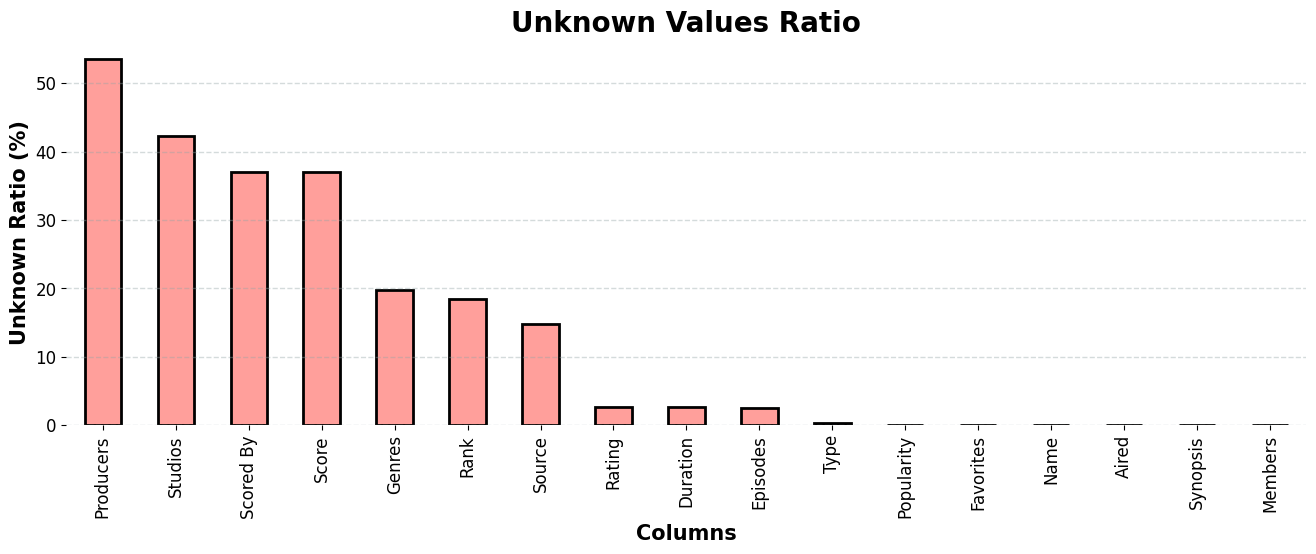

In [8]:
# Đếm số lượng "UNKNOWN" hoặc "Unknown" trong từng cột
unknown_count_per_column = ((raw_anime_df == 'UNKNOWN') | (raw_anime_df == 'Unknown')).sum()

# Tính tỷ lệ "UNKNOWN" trên tổng số dòng
n_rows = len(raw_anime_df)
unknown_ratio_per_column = (unknown_count_per_column / n_rows) * 100

# Chuyển thành DataFrame và sắp xếp giảm dần
unknown_ratio_df = unknown_ratio_per_column.sort_values(ascending=False)

# Vẽ biểu đồ
unknown_ratio_df.plot(kind='bar', figsize=(16, 5), color='#ff9f9b', linewidth=2, edgecolor='k')
plt.title('Unknown Values Ratio', fontsize=20, fontweight='bold')
plt.xlabel('Columns', fontsize=15, weight='bold')
plt.ylabel('Unknown Ratio (%)', fontsize=15, weight='bold')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.show()


In [9]:
def drop_unknown_features(df: pd.DataFrame, threshold: float = 75.0) -> pd.DataFrame:
    if (df is None) or (threshold is None):
        print(f"[LOG] Invalid input.")
        raise ValueError

    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()

    # Count "UNKNOWN" or "Unknown" in each column
    unknown_count_per_column = ((df == 'UNKNOWN') | (df == 'Unknown')).sum()

    # Calculate the percentage of "UNKNOWN" values for each column
    n_rows = len(df)
    unknown_ratio_per_column = (unknown_count_per_column / n_rows) * 100

    # Identify columns exceeding the threshold
    cols_to_trim = unknown_ratio_per_column[unknown_ratio_per_column > threshold].index.tolist()

    if len(cols_to_trim) > 0:
        # Drop the columns identified
        df_cp = df_cp.drop(columns=cols_to_trim)
        print("[LOG] Dropped columns: " + ", ".join(cols_to_trim))
    else:
        print("[LOG] No columns to drop.")

    return df_cp

In [10]:
# Sử dụng hàm
raw_anime_df = drop_unknown_features(raw_anime_df, threshold=75.0)
print(f'The shape of the DataFrame after dropping columns: {raw_anime_df.shape}')

[LOG] No columns to drop.
The shape of the DataFrame after dropping columns: (24905, 17)


Nhóm thấy không có cột nào có số lượng giá trị **UNKNOWN** lớn hơn 75%. Cho nên nhóm sẽ xem xét các thuộc tính nhằm mục đích xóa hoặc điền giá trị cho các giá trị **UNKNOWN** của thuộc tính đó ở các bước sau.

<a class="anchor" id="6.2"></a>

### 6.2. Xem xét các giá trị `UNKNOWN` trong `Score`

Nhóm sẽ trực quan phân phối của thuộc tính `Score` như sau:

The ratio of unknown score and valid score: 58.7114453224573%


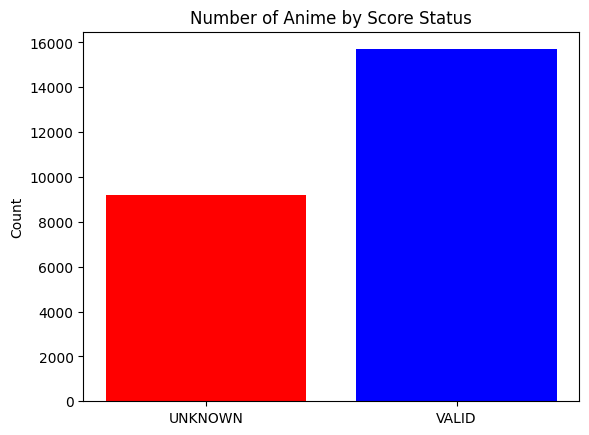

In [11]:
unknown_score_count = (raw_anime_df['Score']=='UNKNOWN').sum()
valid_score_count = (raw_anime_df['Score']).count() - unknown_score_count

ratio = unknown_score_count/valid_score_count * 100

print(f'The ratio of unknown score and valid score: {ratio}%')

counts = [unknown_score_count, valid_score_count]
labels = ['UNKNOWN', 'VALID']

# Plot the data
plt.bar(labels, counts, color = ['red', 'blue'])
plt.title('Number of Anime by Score Status')
plt.ylabel('Count')
plt.show()

Bởi vì tỉ lệ giá trị **UNKNOWN** trong cột Score quá lớn, nên nhóm sẽ xóa những dòng có giá trị Score là **UNKNOWN**

In [12]:
# Check the shape of origin datasets
print('Shape of origin dataset', raw_anime_df.shape)

# Check the shape of dataset after drop rows
raw_anime_df = raw_anime_df[raw_anime_df['Score']!='UNKNOWN']
print('Shape of datasets after droping raws', raw_anime_df.shape)

Shape of origin dataset (24905, 17)
Shape of datasets after droping raws (15692, 17)


<a class="anchor" id="6.3"></a>

### 6.3. Loại bỏ các giá trị `UNKNOWN` trong cột `Genres`

Các giá trị **UNKNOWN** trong cột Genres có ảnh hưởng rất lớn đến bộ dữ liệu, bởi vì cột này được xác định bởi nội dung của bộ phim nên các giá trị bị thiếu không thể được điền bằng bất kỳ giá trị nào khác. Do đó, nhóm sẽ xóa các hàng có giá trị bị thiếu của cột này.

In [13]:
# Drop các giá trị Unknown trong cột Genres
# Check the shape of origin datasets
print('Shape of origin dataset', raw_anime_df.shape)

# Check the shape of dataset after drop rows
raw_anime_df = raw_anime_df[raw_anime_df['Genres']!='UNKNOWN']
print('Shape of datasets after droping raws', raw_anime_df.shape)

Shape of origin dataset (15692, 17)
Shape of datasets after droping raws (13939, 17)


<a class="anchor" id="6.4"></a>

### 6.4. Xem xét các giá trị `UNKNOWN` của cột `Type`

In [14]:
type_unknown_value = raw_anime_df[(raw_anime_df['Type'] == 'UNKNOWN') | (raw_anime_df['Type'] == 'Unknown')]
type_unknown_value

,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Producers,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members
4978,Sekai Meisaku Douwa,6.08,Fantasy,Another of Toei's World Famous Fairy Tale seri...,UNKNOWN,20.0,Oct 1975 to Feb 1983,UNKNOWN,UNKNOWN,Unknown,10 min per ep,G - All Ages,8485.0,13677,2,158.0,729


Nhóm thấy được có 1 bộ duy nhất không có Type, nhưng bộ này có Episodes = 20. Do đó, nhóm sẽ điền Type là TV 

In [15]:
raw_anime_df.loc[(raw_anime_df['Type'] == 'UNKNOWN') | (raw_anime_df['Type'] == 'Unknown'), 'Type'] = 'TV'

<a class="anchor" id="6.5"></a>

### 6.5. Điều chỉnh giá trị của cột `Duration`

Các giá trị **UNKNOWN** trong cột Duration nên được loại bỏ khỏi dữ liệu do tính chất đặc trưng về mặt thời gian của chúng có ảnh hưởng rất lớn đến bộ dữ liệu, bởi vì cột này được xác định bởi tính chất của bộ phim nên các giá trị bị thiếu không thể được điền bằng bất kỳ giá trị nào khác.

In [16]:
# Check the shape of origin datasets
print('Shape of origin dataset', raw_anime_df.shape)

# Check the shape of dataset after drop rows
raw_anime_df = raw_anime_df[raw_anime_df['Duration']!='Unknown']
print('Shape of datasets after droping raws', raw_anime_df.shape)

Shape of origin dataset (13939, 17)
Shape of datasets after droping raws (13925, 17)


Nhóm xem xét rằng dữ liệu trong cột `Duration` nên được điều chỉnh lại cho phù hợp để dữ liệu gọn gàng hơn và sạch hơn.

In [17]:
# Hiện tại, dữ liệu trong cột Duration có dạng "24 min per ep", ... Cho nên, nhóm sẽ điều chỉnh lại
# dữ liệu cột này thành "24".

# Hàm chuyển đổi chuỗi thời gian thành số phút
def convert_to_minutes(time_str):
    total_minutes = 0
    
    # Tìm tất cả các phần giờ, phút và giây trong chuỗi
    hours_match = re.search(r'(\d+)\s*hr', time_str)
    minutes_match = re.search(r'(\d+)\s*min', time_str)
    seconds_match = re.search(r'(\d+)\s*sec', time_str)
    
    # Thêm số phút từ phần 'min'
    if minutes_match:
        total_minutes += int(minutes_match.group(1))
    
    # Thêm số phút từ phần 'hr' nếu có
    if hours_match:
        total_minutes += int(hours_match.group(1)) * 60
    
    # Thêm số phút từ phần 'sec' nếu có
    if seconds_match:
        total_minutes += round(int(seconds_match.group(1)) / 60, 2)
    
    return total_minutes

# Áp dụng hàm chuyển đổi cho cột Duration và đổi tên cột
raw_anime_df['Duration'] = raw_anime_df['Duration'].apply(convert_to_minutes)
raw_anime_df.rename(columns={'Duration': 'Time per ep (Min)'}, inplace=True)

# In ra DataFrame đã xử lý
raw_anime_df.head()

,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Producers,Studios,Source,Time per ep (Min),Rating,Rank,Popularity,Favorites,Scored By,Members
0,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,Sunrise,Original,24.0,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505
1,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001","Sunrise, Bandai Visual",Bones,Original,115.0,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978
2,Trigun,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,Madhouse,Manga,24.0,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252
3,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002","Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,Original,25.0,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931
4,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Toei Animation,Manga,23.0,PG - Children,4240.0,5126,14,6413.0,15001


<a class="anchor" id="6.6"></a>

### 6.6. Điều chỉnh giá trị cột `Aired`. Tạo ra 2 cột mới là `Realeased date` và `Completed date` từ `Aired`

Nhóm nhận thấy rằng dữ liệu cột `Aired` rất quan trọng với bộ dữ liệu này, nguyên nhân là do mỗi bộ anime đều cần có ngày khởi chiếu và ngày kết thúc. Tuy nhiên, cách biểu diễn dữ liệu trong cột `Aired` là chưa hợp lý. Do đó, nhóm sẽ thêm vào hai cột mới là `Realeased date` và `Completed date` để biểu diễn tốt hơn dữ liệu.

In [18]:
### Kiểm tra có bao nhiêu dòng có dữ liệu Aired là Not available
not_available_rows = raw_anime_df[raw_anime_df['Aired'] == 'Not available']
print(not_available_rows.shape)

(5, 17)


In [19]:
### Lấy các dòng không có dữ liệu Aired là Not available
raw_anime_df = raw_anime_df[raw_anime_df['Aired'] != 'Not available']
print(raw_anime_df.shape)

(13920, 17)


In [20]:
def preprocess_published(df):
    """
    Preprocesses the 'Published' column in the DataFrame.

    Args:
        df: The DataFrame containing the 'Published' column.

    Returns:
        The DataFrame with 'Released date' and 'Completed date' columns preprocessed.
    """
    def parse_single_date(date_str, is_start_date=True):
        if "," in date_str:
          parts = date_str.split(",")
          if len(parts) == 2 and parts[0].isdigit() and len(parts[0].strip()) <= 2:  # "12, 1999"
              try:
                  month = int(parts[0].strip())
                  year = int(parts[1].strip())
                  if 1 <= month <= 12:  # Nếu tháng hợp lệ
                      return f"{year:04d}-{month:02d}-01"  # Chuyển thành "YYYY-MM-DD"
              except ValueError:
                  pass
        for fmt in ["%b %d, %Y", "%b %Y", "%Y", "%b-%y"]:
            try:
                return datetime.strptime(date_str, fmt).strftime("%Y-%m-%d")
            except ValueError:
                continue
        return "Unknown" if is_start_date else "Updating"

    def parse_published(published_str):
        if not isinstance(published_str, str) or not published_str.strip():
            return "Unknown", "Updating"

        published_str = published_str.strip()

        if 'to' in published_str:
            try:
                start_date_str, end_date_str = map(str.strip, published_str.split('to'))
            except ValueError:
                return "Unknown", "Updating"

            start_date = parse_single_date(start_date_str, is_start_date=True)
            end_date = parse_single_date(end_date_str, is_start_date=False)
            return start_date, end_date
        else:
            start_date = parse_single_date(published_str, is_start_date=True)
            return start_date, "Updating"

    # Áp dụng hàm xử lý và tạo hai cột mới
    df['Released date'], df['Completed date'] = zip(*df['Aired'].apply(parse_published))
    return df

raw_anime_df = preprocess_published(raw_anime_df)
raw_anime_df.head()

,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Producers,Studios,Source,Time per ep (Min),Rating,Rank,Popularity,Favorites,Scored By,Members,Released date,Completed date
0,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,Sunrise,Original,24.0,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,1998-04-03,1999-04-24
1,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001","Sunrise, Bandai Visual",Bones,Original,115.0,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,2001-09-01,Updating
2,Trigun,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,Madhouse,Manga,24.0,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,1998-04-01,1998-09-30
3,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002","Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,Original,25.0,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,2002-07-03,2002-12-25
4,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Toei Animation,Manga,23.0,PG - Children,4240.0,5126,14,6413.0,15001,2004-09-30,2005-09-29


In [21]:
### Nếu Aired chỉ có 1 ngày duy nhất, thì Published date và Completed date là cùng 1 ngày
def update_completed_date(row):
    """Updates 'Completed date' based on 'Published' and 'Completed date'."""
    if 'to' not in str(row['Aired']) and row['Completed date'] == 'Updating':
        return row['Released date']
    return row['Completed date']

raw_anime_df['Completed date'] = raw_anime_df.apply(update_completed_date, axis=1)

In [22]:
raw_anime_df.head()

,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Producers,Studios,Source,Time per ep (Min),Rating,Rank,Popularity,Favorites,Scored By,Members,Released date,Completed date
0,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,Sunrise,Original,24.0,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,1998-04-03,1999-04-24
1,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001","Sunrise, Bandai Visual",Bones,Original,115.0,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,2001-09-01,2001-09-01
2,Trigun,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,Madhouse,Manga,24.0,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,1998-04-01,1998-09-30
3,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002","Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,Original,25.0,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,2002-07-03,2002-12-25
4,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Toei Animation,Manga,23.0,PG - Children,4240.0,5126,14,6413.0,15001,2004-09-30,2005-09-29


Khi đã tạo xong hai cột dữ liệu mới là `Realeased date` và `Completed date` từ cột `Aired`, thì nhóm sẽ xóa cột `Aired` đi để không bị trùng lặp dữ liệu

In [23]:
raw_anime_df = raw_anime_df.drop(columns=['Aired'])
raw_anime_df.head()

,Name,Score,Genres,Synopsis,Type,Episodes,Producers,Studios,Source,Time per ep (Min),Rating,Rank,Popularity,Favorites,Scored By,Members,Released date,Completed date
0,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,Bandai Visual,Sunrise,Original,24.0,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,1998-04-03,1999-04-24
1,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sunrise, Bandai Visual",Bones,Original,115.0,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,2001-09-01,2001-09-01
2,Trigun,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,Victor Entertainment,Madhouse,Manga,24.0,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,1998-04-01,1998-09-30
3,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,Original,25.0,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,2002-07-03,2002-12-25
4,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"TV Tokyo, Dentsu",Toei Animation,Manga,23.0,PG - Children,4240.0,5126,14,6413.0,15001,2004-09-30,2005-09-29


<a class="anchor" id="6.7"></a>

### 6.7. Xem xét dữ liệu của cột `Episodes`

Như thường lệ, nhóm sẽ kiểm tra trong bộ dữ liệu có hàng nào có `Episodes` là **UNKNOWN** hay không. Nhóm sẽ kiểm tra như sau:

In [24]:
unknown_data = raw_anime_df[raw_anime_df['Episodes']=='UNKNOWN']
unknown_data.head()

,Name,Score,Genres,Synopsis,Type,Episodes,Producers,Studios,Source,Time per ep (Min),Rating,Rank,Popularity,Favorites,Scored By,Members,Released date,Completed date
11,One Piece,8.69,"Action, Adventure, Fantasy","Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,"Fuji TV, TAP, Shueisha",Toei Animation,Manga,24.0,PG-13 - Teens 13 or older,55.0,20,198986,1226493.0,2168904,1999-10-20,Updating
211,Detective Conan,8.17,"Adventure, Comedy, Mystery","Shinichi Kudou, a high school student of astou...",TV,UNKNOWN,"Yomiuri Telecasting, TMS-Kyokuchi, Shogakukan",TMS Entertainment,Manga,25.0,PG-13 - Teens 13 or older,382.0,653,13964,154061.0,334559,1996-01-08,Updating
871,Crayon Shin-chan,7.77,"Comedy, Ecchi",There is no such thing as an uneventful day in...,TV,UNKNOWN,TV Asahi,Shin-Ei Animation,Manga,21.0,G - All Ages,972.0,2228,1178,39023.0,79676,1992-04-13,Updating
1093,Nintama Rantarou,7.07,Comedy,"Taking place in the Sengoku Period, Rantarou, ...",TV,UNKNOWN,NHK,Ajia-do,Manga,10.0,G - All Ages,3681.0,6925,68,2346.0,7180,1993-04-10,Updating
1787,Sore Ike! Anpanman,6.53,"Comedy, Fantasy","One night, a Star of Life falls down the chimn...",TV,UNKNOWN,"Sotsu, Nippon Television Network",TMS Entertainment,Picture book,24.0,PG - Children,6222.0,8982,25,1146.0,3545,1988-10-03,Updating


Các dữ liệu có giá trị `UNKNOWN` trong cột `Episodes` có thể suy luận được từ những bộ anime khác có ngày khởi chiếu gần nhất với bộ anime đang xét, cũng như dựa vào `Type` của bộ anime đó. Để có thể thực hiện được ý tưởng này, nhóm sẽ sắp xếp lại cột `Released date` theo thứ tự tăng dần của thời gian. Điều đó được thực hiện như sau:

In [25]:
raw_anime_df = raw_anime_df.sort_values(by=['Released date'], ascending=[True])

# Reset lại index bắt đầu từ 0
raw_anime_df = raw_anime_df.reset_index(drop=True)

raw_anime_df.head()

,Name,Score,Genres,Synopsis,Type,Episodes,Producers,Studios,Source,Time per ep (Min),Rating,Rank,Popularity,Favorites,Scored By,Members,Released date,Completed date
0,Imokawa Mukuzo: Genkanban no Maki,5.28,Comedy,The third professionally produced Japanese ani...,Movie,1.0,Tenkatsu Tennenshoku Katsudou Shashin,UNKNOWN,Original,8.0,G - All Ages,11399.0,12585,2,353.0,1017,1917-01-01,Updating
1,Dekobou Shingachou: Meian no Shippai,5.77,Comedy,A man first realizes he's born to be a samurai...,Movie,1.0,UNKNOWN,UNKNOWN,Original,5.0,G - All Ages,9816.0,11619,10,575.0,1414,1917-02-01,Updating
2,Saru to Kani no Gassen,4.83,Drama,A monkey tricks a crab and steals his food. Mo...,Movie,1.0,UNKNOWN,UNKNOWN,Other,6.0,G - All Ages,12162.0,12621,1,383.0,1007,1917-05-20,1917-05-20
3,Namakura Gatana,5.5,Comedy,"Namakura Gatana, meaning ""dull-edged sword,"" i...",Movie,1.0,UNKNOWN,UNKNOWN,Original,4.0,G - All Ages,10771.0,6371,11,5344.0,8792,1917-06-30,1917-06-30
4,Hanasaka Jijii,4.8,"Comedy, Drama",Short movie produced by the first generation a...,Movie,1.0,UNKNOWN,UNKNOWN,Other,6.0,G - All Ages,12200.0,12203,0,514.0,1150,1917-08-26,1917-08-26


Nhóm sẽ xử lí các giá trị `UNKNOWN` trong cột `Episodes` như sau:
- Nếu dòng có giá trị UNKNOWN đó có giá trị Type = TV thì nhóm sẽ lấy ra max của 10 giá trị có Type là TV khác và có ngày khởi chiếu gần nhất với bộ anime đang được xét
- Nếu dòng có giá trị UNKNOWN đó có giá trị Type là kiểu khác thì nhóm sẽ đặt giá trị bằng 1

In [26]:
# Chuyển đổi cột Episodes sang số (UNKNOWN -> NaN)
raw_anime_df['Episodes'] = pd.to_numeric(raw_anime_df['Episodes'], errors='coerce')

# Lọc DataFrame chỉ chứa các dòng có Type là TV
tv_anime_df = raw_anime_df[raw_anime_df['Type'] == 'TV']

# Duyệt qua từng dòng của DataFrame gốc
for idx, value in raw_anime_df['Episodes'].items():
    if pd.isna(value) and raw_anime_df.at[idx, 'Type'] == 'TV':  # Nếu Episodes là NaN (do UNKNOWN)
        # Xác định vị trí dòng tương ứng trong DataFrame TV
        tv_indices = tv_anime_df.index  # Chỉ số của các dòng có Type là TV
        
        # Tìm vị trí của idx trong danh sách tv_indices
        if idx in tv_indices:
            position = tv_indices.get_loc(idx)  # Vị trí của idx trong danh sách tv_indices
            
            # Lấy 5 dòng trước và 5 dòng sau từ DataFrame TV
            start_pos = max(0, position - 5)
            end_pos = min(len(tv_indices), position + 5 + 1)
            
            # Lấy giá trị Episodes trong phạm vi này
            surrounding_values = raw_anime_df.loc[tv_indices[start_pos:end_pos], 'Episodes'].dropna()
            
            # Tìm giá trị lớn nhất
            max_value = surrounding_values.max() if not surrounding_values.empty else None
            
            print(f"Dòng {idx}: UNKNOWN, max trong phạm vi [TV dòng {start_pos} đến {end_pos - 1}] là {max_value}")
            
            # Thay thế giá trị UNKNOWN bằng max_value
            raw_anime_df.at[idx, 'Episodes'] = max_value
    elif pd.isna(value): 
        raw_anime_df.at[idx, 'Episodes'] = 1

Dòng 244: UNKNOWN, max trong phạm vi [TV dòng 37 đến 47] là 156.0
Dòng 1313: UNKNOWN, max trong phạm vi [TV dòng 436 đến 446] là 164.0
Dòng 1783: UNKNOWN, max trong phạm vi [TV dòng 537 đến 547] là 170.0
Dòng 1928: UNKNOWN, max trong phạm vi [TV dòng 565 đến 575] là 170.0
Dòng 2182: UNKNOWN, max trong phạm vi [TV dòng 607 đến 617] là 55.0
Dòng 2220: UNKNOWN, max trong phạm vi [TV dòng 624 đến 634] là 52.0
Dòng 2319: UNKNOWN, max trong phạm vi [TV dòng 644 đến 654] là 114.0
Dòng 2750: UNKNOWN, max trong phạm vi [TV dòng 765 đến 775] là 26.0
Dòng 2969: UNKNOWN, max trong phạm vi [TV dòng 862 đến 872] là 68.0
Dòng 4561: UNKNOWN, max trong phạm vi [TV dòng 1353 đến 1363] là 50.0
Dòng 6464: UNKNOWN, max trong phạm vi [TV dòng 1990 đến 2000] là 52.0
Dòng 8584: UNKNOWN, max trong phạm vi [TV dòng 2578 đến 2588] là 51.0
Dòng 9808: UNKNOWN, max trong phạm vi [TV dòng 2961 đến 2971] là 100.0
Dòng 12463: UNKNOWN, max trong phạm vi [TV dòng 3820 đến 3830] là 24.0
Dòng 13224: UNKNOWN, max trong phạ

<a class="anchor" id="6.8"></a>

### 6.8. Kiểm tra dữ liệu của cột `Rating`

Nhóm sẽ kiểm tra có các giá trị phân biệt nào xuất hiện trong cột `Rating`, cũng như kiếm tra tỉ lệ giữa số lượng dòng có dữ liệu về `Rating` và số lượng dòng có giá trị là `UNKNOWN`

In [27]:
print(raw_anime_df['Rating'].unique())

unknown_rating_count = (raw_anime_df['Rating']=='UNKNOWN').sum()
valid_rating_count = (raw_anime_df['Rating']).count() - unknown_rating_count

ratio = unknown_rating_count/valid_rating_count * 100

print('------------\n')
print(f'The ratio of unknown rating and valid rating: {ratio}%')

['G - All Ages' 'PG - Children' 'R - 17+ (violence & profanity)'
 'PG-13 - Teens 13 or older' 'R+ - Mild Nudity' 'UNKNOWN' 'Rx - Hentai']
------------

The ratio of unknown rating and valid rating: 0.6216567876246928%


Nhóm nhận thấy rằng tỉ lệ giữa số lượng dòng có dữ liệu về `Rating` và số lượng dòng có giá trị là `UNKNOWN` là tương đối lớn. Đồng thời dữ liệu này được xác định bởi nội dung của bộ phim nên các giá trị bị thiếu không thể được điền bằng bất kỳ giá trị nào khác. Do đó, nhóm sẽ xóa các hàng có giá trị bị thiếu của cột này.

In [28]:
# Loại bỏ các hàng có 'Rating' là 'UNKNOWN'
raw_anime_df = raw_anime_df[raw_anime_df['Rating'] != 'UNKNOWN']

<a class="anchor" id="6.9"></a>

### 6.9. Kiểm tra dữ liệu của cột `Score By`

In [29]:
unknown_scored_by_count = (raw_anime_df['Scored By']=='UNKNOWN').sum()
valid_scored_by_count = (raw_anime_df['Scored By']).count() - unknown_scored_by_count

ratio = unknown_scored_by_count/valid_scored_by_count * 100

print(f'The ratio of unknown Scored By and valid Scored By: {ratio}%')

The ratio of unknown Scored By and valid Scored By: 0.0%


Dữ liệu của cột này rất tốt với 0% tỉ lệ giá trị bị `UNKNOWN`

<a class="anchor" id="6.10"></a>

### 6.10. Điều chỉnh lại dữ liệu của cột `Rank`

In [30]:
unknown_rank_count = (raw_anime_df['Rank']=='UNKNOWN').sum()
valid_rank_count = (raw_anime_df['Rank']).count() - unknown_rank_count

ratio = unknown_rank_count/valid_rank_count * 100

print(f'The ratio of unknown Rank and valid Rank: {ratio}%')

The ratio of unknown Rank and valid Rank: 15.998658393426126%


Trước khi điền Rank, nhóm sẽ kiểm tra lại kiểu dữ liệu của data như sau:

In [31]:
raw_anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13834 entries, 0 to 13919
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               13834 non-null  object 
 1   Score              13834 non-null  object 
 2   Genres             13834 non-null  object 
 3   Synopsis           13834 non-null  object 
 4   Type               13834 non-null  object 
 5   Episodes           13834 non-null  float64
 6   Producers          13834 non-null  object 
 7   Studios            13834 non-null  object 
 8   Source             13834 non-null  object 
 9   Time per ep (Min)  13834 non-null  float64
 10  Rating             13834 non-null  object 
 11  Rank               13834 non-null  object 
 12  Popularity         13834 non-null  int64  
 13  Favorites          13834 non-null  int64  
 14  Scored By          13834 non-null  object 
 15  Members            13834 non-null  int64  
 16  Released date      13834 no

Dựa vào output ở trên, có một vài cột có kiểu dữ liệu chưa phù hợp. Nhóm sẽ xử lí kiểu dữ liệu của một vài cột để cho ra bộ dữ liệu tối ưu:

In [32]:
# Chuyển kiểu dữ liệu:
raw_anime_df = raw_anime_df.astype({
    'Name': 'object',
    'Score': 'float64',
    'Genres': 'object',
    'Synopsis': 'object',
    'Type': 'object',
    'Episodes': 'float64',
    'Producers': 'object',
    'Studios': 'object',
    'Source': 'object',
    'Time per ep (Min)': 'float64',
    'Rating': 'object',
    'Popularity': 'float64',
    'Favorites': 'float64',
    'Scored By': 'float64',  # "objeect -> int64" typo corrected
    'Members': 'float64',
})

Về hai thuộc tính `Released date` và `Completed date`, nhóm nhận thấy rằng:
- Thuộc tính `Released date` có thể chuyển sang được `datetime64` do toàn bộ các dòng trong cột dữ liệu này đều là dữ liệu ngày, tháng, năm.
- Thuộc tính `Completed date` nên giữ lại kiểu dữ liệu `object` do trong cột dữ liệu này có một vài dữ liệu có giá trị **Updating**. Có thể chuyển dữ liệu cột này sang `datetime64` trong các trường hợp đặc thù, khi không cần xét các giá trị **Updating** 

In [33]:
# Chỉ lấy hai cột cần thiết
columns_to_check = ["Released date", "Completed date"]

# Đếm số lượng "Updating" trong từng cột được chọn
updating_count = (raw_anime_df[columns_to_check] == 'Updating').sum()

# Xem kết quả
print("Số lượng 'UNKNOWN' hoặc 'Unknown' trong từng cột:")
print(updating_count)

Số lượng 'UNKNOWN' hoặc 'Unknown' trong từng cột:
Released date       0
Completed date    107
dtype: int64


In [34]:
raw_anime_df['Released date'] = pd.to_datetime(raw_anime_df['Released date'], errors='coerce').dt.normalize()

#### Điền giá trị cho cột `Rank`
Rank được xếp theo số điểm, nhưng trong dataset ban đầu rank và số điểm không được sắp xếp chính xác. Vì vậy nhóm sẽ thực hiện sắp xếp lại Rank theo độ ưu tiên giảm dần các thuộc tính: `Score`, `Scored By` và `Name`

Sử dụng `Scored by` do cột này không thiếu giá trị nào, đồng thời số điểm theo đánh giá sẽ có giá trị hơn nếu càng nhiều người đánh giá

In [35]:
# available_rows = raw_anime_df[raw_anime_df['Rank'] != 'UNKNOWN']

# Thêm một cột tạm để đánh dấu các giá trị 'UNKNOWN'
raw_anime_df['Score_numeric'] = pd.to_numeric(raw_anime_df['Score'], errors='coerce')

# Sắp xếp theo cột 'Rank_numeric' (giá trị số trước), sau đó theo cột 'Rank' gốc để giữ lại thứ tự đúng
raw_anime_df = raw_anime_df.sort_values(by=['Score_numeric', 'Score', 'Scored By', 'Name'], ascending=[False, False, False, True])

# Xóa cột tạm
raw_anime_df = raw_anime_df.drop(columns=['Score_numeric'])

# Tạo thứ tự tăng dần từ 1 đến số lượng dòng
raw_anime_df['Rank'] = range(1, len(raw_anime_df) + 1)

In [36]:
raw_anime_df.head()

,Name,Score,Genres,Synopsis,Type,Episodes,Producers,Studios,Source,Time per ep (Min),Rating,Rank,Popularity,Favorites,Scored By,Members,Released date,Completed date
6043,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,64.0,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,24.0,R - 17+ (violence & profanity),1,3.0,217606.0,2020030.0,3176556.0,2009-04-05,2010-07-04
6955,Steins;Gate,9.07,"Drama, Sci-Fi, Suspense",Eccentric scientist Rintarou Okabe has a never...,TV,24.0,"Frontier Works, Media Factory, Kadokawa Shoten...",White Fox,Visual novel,24.0,PG-13 - Teens 13 or older,2,13.0,182964.0,1336233.0,2440369.0,2011-04-06,2011-09-14
13663,Bleach: Sennen Kessen-hen,9.07,"Action, Adventure, Fantasy",Substitute Soul Reaper Ichigo Kurosaki spends ...,TV,13.0,"TV Tokyo, Aniplex, Dentsu, Shueisha",Pierrot,Manga,24.0,R - 17+ (violence & profanity),3,464.0,17999.0,213872.0,445198.0,2022-10-11,2022-12-27
9237,Gintama°,9.06,"Action, Comedy, Sci-Fi","Gintoki, Shinpachi, and Kagura return as the f...",TV,51.0,"TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,Manga,24.0,PG-13 - Teens 13 or older,4,331.0,15947.0,237957.0,595767.0,2015-04-08,2016-03-30
11783,Shingeki no Kyojin Season 3 Part 2,9.05,"Action, Drama",Seeking to restore humanity's diminishing hope...,TV,10.0,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,23.0,R - 17+ (violence & profanity),5,24.0,55245.0,1471825.0,2104016.0,2019-04-29,2019-07-01


<a class="anchor" id="7"></a>

## 7. LƯU DỮ LIỆU ĐÃ ĐƯỢC XỬ LÝ: 

<a class="anchor" id="7.1"></a>

### 7.1. Kiểm tra lại kiểu dữ liệu của các cột, các thuộc tính:

Nhóm sẽ kiểm tra lại các kiểu dữ liệu của các thuộc tính

In [37]:
raw_anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13834 entries, 6043 to 4416
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               13834 non-null  object        
 1   Score              13834 non-null  float64       
 2   Genres             13834 non-null  object        
 3   Synopsis           13834 non-null  object        
 4   Type               13834 non-null  object        
 5   Episodes           13834 non-null  float64       
 6   Producers          13834 non-null  object        
 7   Studios            13834 non-null  object        
 8   Source             13834 non-null  object        
 9   Time per ep (Min)  13834 non-null  float64       
 10  Rating             13834 non-null  object        
 11  Rank               13834 non-null  int64         
 12  Popularity         13834 non-null  float64       
 13  Favorites          13834 non-null  float64       
 14  Scored By

Nhóm cũng sẽ điều chỉnh kiểu dữ liệu của các thuộc tính sao cho mỗi thuộc tính đều luôn có kiểu dữ liệu phù hợp và hiệu quả nhất.

| **CỘT**               |**KIỂU DỮ LIỆU**               |
|:----------------------|:-------------------------------------------------------------|
|**`Name`**            | object                      |
|**`Score`**         | float64                        |
|**`Genres`**       | object                   |
|**`Synopsis`**             | object                            |
|**`Type`**       | object                                  |
|**`Episodes`**        | float64              |
|**`Producers`**          | object     |
|**`Studios`**            | object                      |
|**`Source`**         | object                        |
|**`Time per ep (Min)`**| float64                   |
|**`Rating`**             | object                            |
|**`Rank`**       | int64                                  |
|**`Popularity`**        | int64               |
|**`Favourites`**        | int64              |
|**`Scored by`**          | int64     |
|**`Members`**          | int64     |
|**`Released date`**          | datetime64[ns]     |
|**`Completed date`**          | object     |

In [38]:
# Chuyển kiểu dữ liệu:
raw_anime_df = raw_anime_df.astype({
    'Name': 'object',
    'Score': 'float64',
    'Genres': 'object',
    'Synopsis': 'object',
    'Type': 'object',
    'Episodes': 'float64',
    'Producers': 'object',
    'Studios': 'object',
    'Source': 'object',
    'Time per ep (Min)': 'float64',
    'Rating': 'object',
    'Popularity': 'int64',
    'Favorites': 'int64',
    'Scored By': 'int64',
    'Members': 'int64',
})

In [39]:
raw_anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13834 entries, 6043 to 4416
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               13834 non-null  object        
 1   Score              13834 non-null  float64       
 2   Genres             13834 non-null  object        
 3   Synopsis           13834 non-null  object        
 4   Type               13834 non-null  object        
 5   Episodes           13834 non-null  float64       
 6   Producers          13834 non-null  object        
 7   Studios            13834 non-null  object        
 8   Source             13834 non-null  object        
 9   Time per ep (Min)  13834 non-null  float64       
 10  Rating             13834 non-null  object        
 11  Rank               13834 non-null  int64         
 12  Popularity         13834 non-null  int64         
 13  Favorites          13834 non-null  int64         
 14  Scored By

<a class="anchor" id="7.2"></a>

### 7.2. Xuất ra file .csv

In [40]:
# create data processing folder is not exist
# os.makedirs("./Data Preprocessing", exist_ok=True)

# DATA_PREPROCESSING =  os.path.join(HOME, 'Data Preprocessing')

In [41]:
# create data processing folder is not exist
# os.makedirs(DATA_PREPROCESSING, exist_ok=True)

In [42]:
# Xem kết quả
raw_anime_df.to_csv("anime-data-preprocessing.csv", sep=',', encoding='utf-8-sig', index=False, header=True)

<a class="anchor" id="8"></a>

## 8. KIỂM TRA LẠI BỘ DỮ LIỆU

In [43]:
raw_df = pd.read_csv('anime-data-preprocessing.csv')

In [44]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               13834 non-null  object 
 1   Score              13834 non-null  float64
 2   Genres             13834 non-null  object 
 3   Synopsis           13834 non-null  object 
 4   Type               13834 non-null  object 
 5   Episodes           13834 non-null  float64
 6   Producers          13834 non-null  object 
 7   Studios            13834 non-null  object 
 8   Source             13834 non-null  object 
 9   Time per ep (Min)  13834 non-null  float64
 10  Rating             13834 non-null  object 
 11  Rank               13834 non-null  int64  
 12  Popularity         13834 non-null  int64  
 13  Favorites          13834 non-null  int64  
 14  Scored By          13834 non-null  int64  
 15  Members            13834 non-null  int64  
 16  Released date      138

Từ thông tin các kiểu dữ liệu của bộ dữ liệu sau khi Data Preprocessing xong, nhóm nhận thấy là kiểu dữ liệu của `Released date` là `object` thay vì `datetime64[ns]` như đã xử lý ban đầu. Do đó, cần nên có một thao tác chuyển từ `object` sang `datetime64[ns]` ở phần Data Exploring để có thể thực hiện việc khai phá dữ liệu dễ dàng hơn.

In [45]:
# Đếm số lượng "UNKNOWN" trong từng cột
unknown_count_per_column = ((raw_anime_df == 'UNKNOWN') | (raw_anime_df == 'Unknown')).sum()

# Xem kết quả
print("Số lượng 'UNKNOWN' trong từng cột:")
print(unknown_count_per_column)

Số lượng 'UNKNOWN' trong từng cột:
Name                    0
Score                   0
Genres                  0
Synopsis                0
Type                    0
Episodes                0
Producers            5018
Studios              2345
Source               1508
Time per ep (Min)       0
Rating                  0
Rank                    0
Popularity              0
Favorites               0
Scored By               0
Members                 0
Released date           0
Completed date          0
dtype: int64


<a class="anchor" id="9"></a>

## 9. ĐÁNH GIÁ VÀ NGUỒN THAM KHẢO

<a class="anchor" id="9.1"></a>

### 9.1. Suy nghĩ và đánh giá

**Khó khăn**
- Bộ dữ liệu có nhiều thuộc tính có giá trị `Unknown` hoặc `NaN`
- Thuộc tính `Aired` không có sự đồng nhất về dữ liệu (Các giá trị biểu diễn ngày khác nhau)
- Kiểu dữ liệu của một vài thuộc tính chưa phù hợp

**Bài học nhận được**
- Học được cách đọc, ghi file .csv và xử lý kiểu dữ liệu
- Học được các phương pháp xử lí các giá trị `Unknown` và `NaN`
- Học được cách xử lý giá trị ngày tháng trong cột `Aired`

**Nếu còn thời gian**, nhóm sẽ cố gắng xử lí các giá trị `Unknown` và `NaN` bằng các phương pháp chuyên sâu hơn, đồng thời kết hợp nhiều nguồn dữ liệu để làm giàu bộ dữ liệu hơn.

<a class="anchor" id="9.2"></a>

### 9.2. Nguồn tham khảo:

- Trong phần này, nhóm không sử dụng nguồn tham khảo nào